# Analysis of Bias in the diabetes dataset


### NOTE: the initial target for this analysis is 'readmitted'
 - eval readmission rates across the categorical features such as race, gender, admission type, discharge dispo, age etc.
 - discharge classifier..., discharge rates across the same features...
 - regression for health outcomes vs number of procedures...
 - regression for number of days vs discharge dispo..

In [1]:
#import libraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels


In [2]:
#max rows and cols
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [9]:
pwd

'/Users/charles.tippett/Documents/MTSU/DATA6550/Projects/Group5/DATA6550_Group5/DATA6550_Bias/Analysis'

In [11]:
cd ..

/Users/charles.tippett/Documents/MTSU/DATA6550/Projects/Group5/DATA6550_Group5/DATA6550_Bias


In [12]:
ls

Analysis/      Collaboration/ LICENSE
Code/          Data/          README.md


In [13]:
df = pd.read_csv("Data/diabetes_data.csv")

In [14]:
df.head()

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_catg
0,2278392,8222157,Caucasian,Female,u,u,r,1,41,0,1,0,0,0,Diabetes,Other,Other,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,1.0
1,149190,55629189,Caucasian,Female,k,d,o,3,59,0,18,0,0,0,Other,Diabetes,Other,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,1.0
2,64410,86047875,AfricanAmerican,Female,k,d,o,2,11,5,13,2,0,1,Other,Diabetes,Other,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,1.0
3,500364,82442376,Caucasian,Male,k,d,o,2,44,1,16,0,0,0,Other,Diabetes,Circulatory,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,1.0
4,16680,42519267,Caucasian,Male,k,d,o,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,1.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100111 entries, 0 to 100110
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              100111 non-null  int64  
 1   patient_nbr               100111 non-null  int64  
 2   race                      100111 non-null  object 
 3   gender                    100111 non-null  object 
 4   admission_type_id         100111 non-null  object 
 5   discharge_disposition_id  100111 non-null  object 
 6   admission_source_id       100111 non-null  object 
 7   time_in_hospital          100111 non-null  int64  
 8   num_lab_procedures        100111 non-null  int64  
 9   num_procedures            100111 non-null  int64  
 10  num_medications           100111 non-null  int64  
 11  number_outpatient         100111 non-null  int64  
 12  number_emergency          100111 non-null  int64  
 13  number_inpatient          100111 non-null  i

## Step1: create readmit_status so it's Yes/No and get a feel for the proportions

In [22]:
df.readmitted.head(25)

0      NO
1     >30
2      NO
3      NO
4      NO
5     >30
6      NO
7     >30
8      NO
9      NO
10    >30
11    <30
12    <30
13     NO
14    >30
15     NO
16    <30
17     NO
18    >30
19     NO
20     NO
21     NO
22     NO
23    >30
24     NO
Name: readmitted, dtype: object

In [18]:
#create readmit_status
df['readmit_status'] = df['readmitted'].apply(lambda x: 'NO' if x == 'NO' else 'YES')

print(df[['readmitted', 'readmit_status']].head())
print(df['readmit_status'].value_counts())

  readmitted readmit_status
0         NO             NO
1        >30            YES
2         NO             NO
3         NO             NO
4         NO             NO
readmit_status
NO     53209
YES    46902
Name: count, dtype: int64


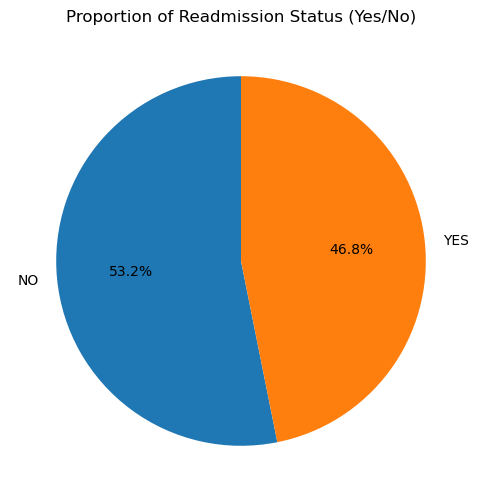

In [19]:
#CHART1 - readmit_status
readmit_counts = df['readmit_status'].value_counts()
readmit_proportions = df['readmit_status'].value_counts(normalize=True)

plt.figure(figsize=(6, 6))
plt.pie(readmit_proportions, labels=readmit_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Readmission Status (Yes/No)")
plt.show()

In [35]:
#Yes only
readmitted_YES = df[df['readmitted']!= 'NO']
readmitted_YES.shape

(46902, 46)

In [36]:
print(readmitted_YES['readmitted'].value_counts())

readmitted
>30    35545
<30    11357
Name: count, dtype: int64


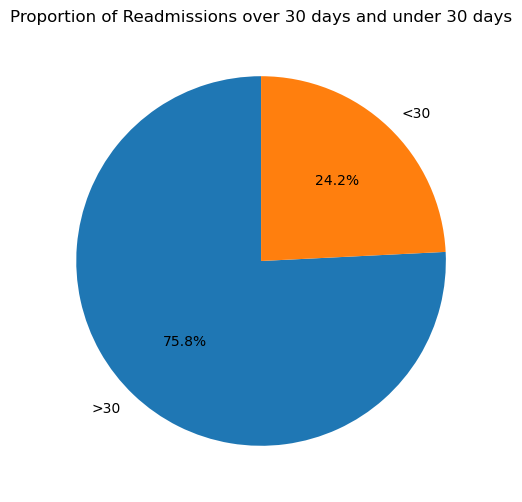

In [38]:
#CHART2 - Readmit <>30 days proportions
readmitted_counts = readmitted_df['readmitted'].value_counts()
readmitted_proportions = readmitted_df['readmitted'].value_counts(normalize=True)

plt.figure(figsize=(6, 6))
plt.pie(readmitted_proportions, labels=readmitted_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Readmissions over 30 days and under 30 days")
plt.show()

## Step2: Look at readmits by tje different classifiers

In [49]:
#counts by race
race_counts = df['race'].value_counts().reset_index()
race_counts.rename(columns={'index': 'race', 'race': 'total_count'}, inplace=True)
race_counts

,total_count,count
0,Caucasian,74845
1,AfricanAmerican,18888
2,Unknown,2237
3,Hispanic,2024
4,Other,1485
5,Asian,632


In [56]:
#readmits by race
readmits_by_race = df_YES.groupby('race')['readmitted'].count().reset_index()
readmits_by_race.rename(columns={'readmitted': 'readmission_count'}, inplace=True)
total_readmits_race = readmits_by_race['readmission_count'].sum()
readmits_by_race['readmission_percentage'] = (readmissions_by_race['readmission_count'] / total_readmissions_race) * 100

readmits_by_race


,race,readmission_count,readmission_percentage
0,AfricanAmerican,8789,18.739073
1,Asian,226,0.481856
2,Caucasian,35716,76.150271
3,Hispanic,854,1.820818
4,Other,591,1.260074
5,Unknown,726,1.547908


In [71]:
#reset index in race_counts
race_counts = race_counts.reset_index()
race_counts.rename(columns={'index': 'race'}, inplace=True)


In [72]:
#convert race to string format
race_counts['race'] = race_counts['race'].astype(str)
readmits_by_race['race'] = readmits_by_race['race'].astype(str)


In [74]:
print("race_counts columns:", race_counts.columns.tolist())
print("readmits_by_race columns:", readmits_by_race.columns.tolist())


race_counts columns: ['race', 'race', 'total_count', 'count']
readmits_by_race columns: ['race', 'readmission_count', 'readmission_percentage']


In [75]:
#dedupe 'race' (see above for the error)
race_counts = race_counts.loc[:, ~race_counts.columns.duplicated()]


In [76]:
print("Updated race_counts columns:", race_counts.columns.tolist())


Updated race_counts columns: ['race', 'total_count', 'count']


In [78]:
race_counts = race_counts.copy()


In [79]:
race_counts['race'] = race_counts['race'].astype(str)
readmits_by_race['race'] = readmits_by_race['race'].astype(str)


In [82]:
#merge df_readmits
df_readmits = race_counts.merge(readmits_by_race, on='race', how='left')

#fix NaNs
df_readmits[['readmission_count', 'readmission_percentage']] = merged_df[['readmission_count', 'readmission_percentage']].fillna(0)

print(merged_df.head())


  race      total_count  count  readmission_count  readmission_percentage
0    0        Caucasian  74845                0.0                     0.0
1    1  AfricanAmerican  18888                0.0                     0.0
2    2          Unknown   2237                0.0                     0.0
3    3         Hispanic   2024                0.0                     0.0
4    4            Other   1485                0.0                     0.0
